In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')

In [2]:
# Loading the data

Root_Dir = 'MNIST'
train_data = datasets.MNIST(
    root = Root_Dir,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

test_data = datasets.MNIST(
    root = Root_Dir,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

9913344it [00:06, 1562708.54it/s]                             


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



29696it [00:00, 2131315.05it/s]          


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



1649664it [00:01, 1120921.78it/s]                             


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



5120it [00:00, 4290676.62it/s]          

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [3]:
train_data.data.dtype

torch.uint8

In [6]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<AxesSubplot:>

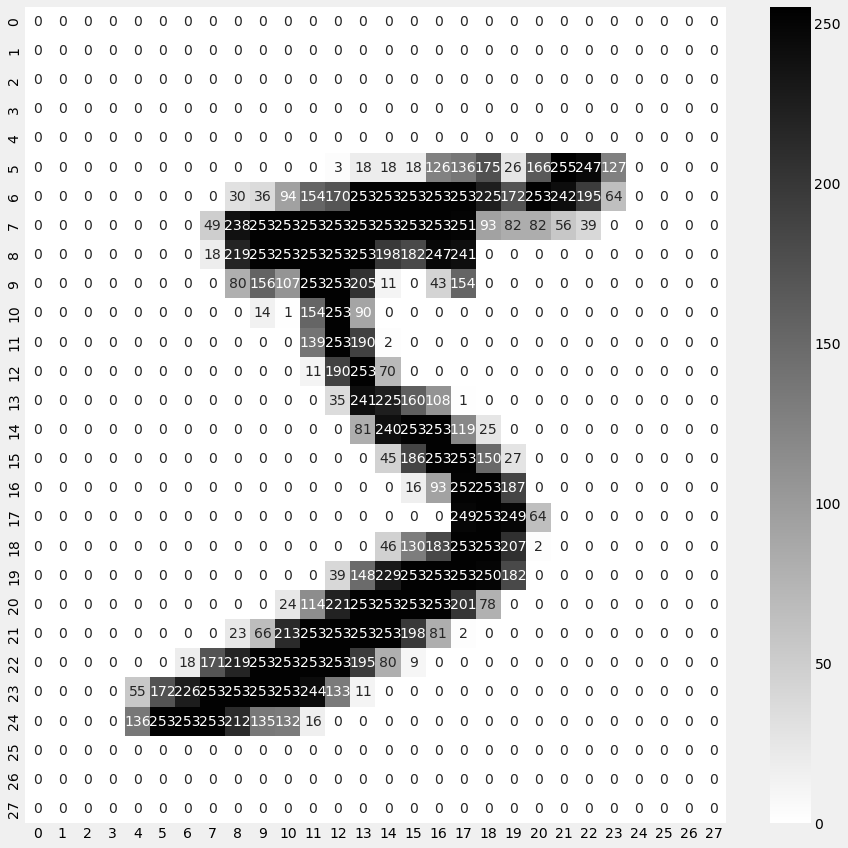

In [16]:
plt.figure(figsize = (14, 14))
sns.heatmap(train_data.data[0], annot = True, cmap = "binary", fmt = 'd')

In [17]:
train_data.data[0].shape

torch.Size([28, 28])

In [18]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [19]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [20]:
BATCH = 128
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = BATCH
)

In [22]:
for x in test_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break


torch.Size([128, 1, 28, 28])
torch.Size([128])


In [23]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
DEVICE

'cpu'

In [ ]:
# Lets define the model
class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_, 256)
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            
        )